# K means clustering for flower

In [30]:
#This code uses numpy, cv2, Pillow, matplotlib libraries.
import numpy as np
import random
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#suppress all warnings 
import warnings
warnings.filterwarnings("ignore")

In [32]:
#this code is used to open the image.
flower=Image.open('flower.png')

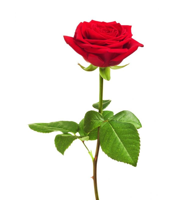

In [33]:
#This is the flower image.
flower

In [34]:
#Converts image into matrix and finds the shape..
Flower_matrix=np.array(flower)
n,m,l=Flower_matrix.shape
n,m,l

(200, 175, 3)

In [35]:
#This code helps n creating 30 different random intialization.
N=30
intial_cluster_means=[]
for i in range(N):
    x1=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    x2=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    x3=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    intial_cluster_means.append([x1,x2,x3])


In [36]:
#This code helps in finding the sum mean square fo all 30 random intialization.
sum_square_error=[]

for z in range(N):
    
    SSE=0
    C1=intial_cluster_means[z][0]
    C2=intial_cluster_means[z][1]
    C3=intial_cluster_means[z][2]
    
    for i in range(n):
        for j in range(m):
            
            K1=sum([k**2 for k in (Flower_matrix[i,j]-C1)])
            K2=sum([k**2 for k in (Flower_matrix[i,j]-C2)])
            K3=sum([k**2 for k in (Flower_matrix[i,j]-C3)])
            K_v=[K1,K2,K3]
            
            SSE += min(K_v)
            
    sum_square_error.append(SSE)

In [37]:
#assigning the random intialization of the minimum and maximum sum_square_error.
S_Ci=sum_square_error.index(min(sum_square_error))
L_Ci=sum_square_error.index(max(sum_square_error))

In [38]:
#intial cluster means for minimum.
SC1=intial_cluster_means[S_Ci][0]
SC2=intial_cluster_means[S_Ci][1]
SC3=intial_cluster_means[S_Ci][2]

In [39]:
#intial cluster means for maximum.
LC1=intial_cluster_means[L_Ci][0]
LC2=intial_cluster_means[L_Ci][1]
LC3=intial_cluster_means[L_Ci][2]

### Flower Image for SME  minimum

In [40]:
#This code is to find out the new cluster means with total of 5 iterations.
for t in range(5):
    
    #This are the 3 empty clusters.
    K1_cluster=[]
    K2_cluster=[]
    K3_cluster=[]
    
    #This code helps in dividing datasets into K_clusters and finding sum square error.
    sse=0
    for i in range(n):
        for j in range(m):
            K1=sum([k**2 for k in (Flower_matrix[i,j]-SC1)])
            K2=sum([k**2 for k in (Flower_matrix[i,j]-SC2)])
            K3=sum([k**2 for k in (Flower_matrix[i,j]-SC3)])
            K_v=[K1,K2,K3]
            K=K_v.index(min(K_v))+1
            
            if K==1:
                K1_cluster.append([i,j])
                sse += min(K_v)
            
            elif K==2:
                K2_cluster.append([i,j])
                sse += min(K_v)
            
            else:
                K3_cluster.append([i,j])
                sse += min(K_v)

    print('This is the SSE(sum_square_error)={}'.format(sse))
            
    #Recompute the patterns centers to be centroids of current clusters by finding the means of each cluster..

    #for K1_cluster
    if len(K1_cluster)==0 or len(K2_cluster)==0 or len(K3_cluster)==0:
        break
    else:
        K1_x=0
        K1_y=0
        K1_z=0
        length_K1_cluster=len(K1_cluster)
        for k1 in range(length_K1_cluster):
            i,j=K1_cluster[k1][0],K1_cluster[k1][1]
            K1_x += Flower_matrix[i,j][0]
            K1_y += Flower_matrix[i,j][1]
            K1_z += Flower_matrix[i,j][2]

        K1_x=round(K1_x/length_K1_cluster)
        K1_y=round(K1_y/length_K1_cluster)
        K1_z=round(K1_z/length_K1_cluster)
        K1_array=[K1_x,K1_y,K1_z]
        print('This is the C1(cluster mean value)={}'.format(K1_array))

        #for K2_cluster
        K2_x=0
        K2_y=0
        K2_z=0
        length_K2_cluster=len(K2_cluster)
        for k2 in range(length_K2_cluster):
            i,j=K2_cluster[k2][0],K2_cluster[k2][1]
            K2_x += Flower_matrix[i,j][0]
            K2_y += Flower_matrix[i,j][1]
            K2_z += Flower_matrix[i,j][2]

        K2_x=round(K2_x/length_K2_cluster)
        K2_y=round(K2_y/length_K2_cluster)
        K2_z=round(K2_z/length_K2_cluster)
        K2_array=[K2_x,K2_y,K2_z]
        print('This is the C2(cluster mean value)={}'.format(K2_array))

        #for K2_cluster
        K3_x=0
        K3_y=0
        K3_z=0
        length_K3_cluster=len(K3_cluster)
        for k3 in range(length_K3_cluster):
            i,j=K3_cluster[k3][0],K3_cluster[k3][1]
            K3_x += Flower_matrix[i,j][0]
            K3_y += Flower_matrix[i,j][1]
            K3_z += Flower_matrix[i,j][2]

        K3_x=round(K3_x/length_K3_cluster)
        K3_y=round(K3_y/length_K3_cluster)
        K3_z=round(K3_z/length_K3_cluster)
        K3_array=[K3_x,K3_y,K3_z]
        print('This is the C3(cluster mean value)={}'.format(K3_array))
        print("\n")
    
        SC1=K1_array
        SC2=K2_array
        SC3=K3_array

This is the SSE(sum_square_error)=-2078494995
This is the C1(cluster mean value)=[178.0, 30.0, 42.0]
This is the C2(cluster mean value)=[255.0, 255.0, 254.0]
This is the C3(cluster mean value)=[107.0, 145.0, 46.0]


This is the SSE(sum_square_error)=21833568.0
This is the C1(cluster mean value)=[190.0, 10.0, 38.0]
This is the C2(cluster mean value)=[254.0, 254.0, 254.0]
This is the C3(cluster mean value)=[106.0, 139.0, 44.0]


This is the SSE(sum_square_error)=20217978.0
This is the C1(cluster mean value)=[190.0, 9.0, 37.0]
This is the C2(cluster mean value)=[254.0, 254.0, 254.0]
This is the C3(cluster mean value)=[106.0, 138.0, 44.0]


This is the SSE(sum_square_error)=20209612.0
This is the C1(cluster mean value)=[190.0, 9.0, 37.0]
This is the C2(cluster mean value)=[254.0, 254.0, 254.0]
This is the C3(cluster mean value)=[106.0, 138.0, 44.0]


This is the SSE(sum_square_error)=20209612.0
This is the C1(cluster mean value)=[190.0, 9.0, 37.0]
This is the C2(cluster mean value)=[254.0,

In [41]:
#This code is used to replace each pixel value in the input image wth the cluster center it belongs to. 
Final_flower_imageS=np.zeros((n,m,l))
for i in range(n):
    for j in range(m):
        if [i,j] in K1_cluster:
            Final_flower_imageS[i,j]=SC1
            
        elif [i,j] in K2_cluster:
            Final_flower_imageS[i,j]=SC2
        
        else:
            Final_flower_imageS[i,j]=SC3

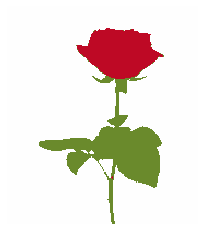

In [42]:
#This is the final image obtained after k means clustering.
plt.imshow(Final_flower_imageS.astype('uint8'))
plt.savefig('flower_image_minimum.png')
plt.axis('off')
plt.show()

### Flower Image for SME maximum

In [44]:
#This code is to find out the new cluster means with total of 5 iterations.
for t in range(5):
    
    #This are the 3 empty clusters.
    K1_cluster=[]
    K2_cluster=[]
    K3_cluster=[]
    
    #This code helps in dividing datasets into K_clusters and sum square error.
    sse=0
    for i in range(n):
        for j in range(m):
            K1=sum([k**2 for k in (Flower_matrix[i,j]-LC1)])
            K2=sum([k**2 for k in (Flower_matrix[i,j]-LC2)])
            K3=sum([k**2 for k in (Flower_matrix[i,j]-LC3)])
            K_v=[K1,K2,K3]
            K=K_v.index(min(K_v))+1
            
            if K==1:
                K1_cluster.append([i,j])
                sse += min(K_v)
            
            elif K==2:
                K2_cluster.append([i,j])
                sse += min(K_v)
            
            else:
                K3_cluster.append([i,j])
                sse += min(K_v)

    print('This is the SSE(sum_square_error)={}'.format(sse))
            
    #Recompute the patterns centers to be centroids of current clusters by finding the means of each cluster.

    #for K1_cluster
    if len(K1_cluster)==0 or len(K2_cluster)==0 or len(K3_cluster)==0:
        break
    else:
        K1_x=0
        K1_y=0
        K1_z=0
        length_K1_cluster=len(K1_cluster)
        for k1 in range(length_K1_cluster):
            i,j=K1_cluster[k1][0],K1_cluster[k1][1]
            K1_x += Flower_matrix[i,j][0]
            K1_y += Flower_matrix[i,j][1]
            K1_z += Flower_matrix[i,j][2]

        K1_x=round(K1_x/length_K1_cluster)
        K1_y=round(K1_y/length_K1_cluster)
        K1_z=round(K1_z/length_K1_cluster)
        K1_array=[K1_x,K1_y,K1_z]
        print('This is the C1(cluster mean value)={}'.format(K1_array))

        #for K2_cluster
        K2_x=0
        K2_y=0
        K2_z=0
        length_K2_cluster=len(K2_cluster)
        for k2 in range(length_K2_cluster):
            i,j=K2_cluster[k2][0],K2_cluster[k2][1]
            K2_x += Flower_matrix[i,j][0]
            K2_y += Flower_matrix[i,j][1]
            K2_z += Flower_matrix[i,j][2]

        K2_x=round(K2_x/length_K2_cluster)
        K2_y=round(K2_y/length_K2_cluster)
        K2_z=round(K2_z/length_K2_cluster)
        K2_array=[K2_x,K2_y,K2_z]
        print('This is the C2(cluster mean value)={}'.format(K2_array))

        #for K2_cluster
        K3_x=0
        K3_y=0
        K3_z=0
        length_K3_cluster=len(K3_cluster)
        for k3 in range(length_K3_cluster):
            i,j=K3_cluster[k3][0],K3_cluster[k3][1]
            K3_x += Flower_matrix[i,j][0]
            K3_y += Flower_matrix[i,j][1]
            K3_z += Flower_matrix[i,j][2]

        K3_x=round(K3_x/length_K3_cluster)
        K3_y=round(K3_y/length_K3_cluster)
        K3_z=round(K3_z/length_K3_cluster)
        K3_array=[K3_x,K3_y,K3_z]
        print('This is the C3(cluster mean value)={}'.format(K3_array))
        print("\n")
    
        LC1=K1_array
        LC2=K2_array
        LC3=K3_array

This is the SSE(sum_square_error)=2085997406
This is the C1(cluster mean value)=[255.0, 255.0, 255.0]
This is the C2(cluster mean value)=[151.0, 177.0, 108.0]
This is the C3(cluster mean value)=[184.0, 19.0, 40.0]


This is the SSE(sum_square_error)=46464691.0
This is the C1(cluster mean value)=[255.0, 255.0, 254.0]
This is the C2(cluster mean value)=[114.0, 147.0, 52.0]
This is the C3(cluster mean value)=[174.0, 19.0, 34.0]


This is the SSE(sum_square_error)=21759491.0
This is the C1(cluster mean value)=[254.0, 254.0, 254.0]
This is the C2(cluster mean value)=[107.0, 140.0, 45.0]
This is the C3(cluster mean value)=[188.0, 9.0, 36.0]


This is the SSE(sum_square_error)=20231528.0
This is the C1(cluster mean value)=[254.0, 254.0, 254.0]
This is the C2(cluster mean value)=[106.0, 138.0, 44.0]
This is the C3(cluster mean value)=[190.0, 9.0, 37.0]


This is the SSE(sum_square_error)=20209612.0
This is the C1(cluster mean value)=[254.0, 254.0, 254.0]
This is the C2(cluster mean value)=[106

In [45]:
#This code is used to replace each pixel value in the input image wth the cluster center it belongs to. 
Final_flower_imageL=np.zeros((n,m,l))
for i in range(n):
    for j in range(m):
        if [i,j] in K1_cluster:
            Final_flower_imageL[i,j]=LC1
            
        elif [i,j] in K2_cluster:
            Final_flower_imageL[i,j]=LC2
        
        else:
            Final_flower_imageL[i,j]=LC3

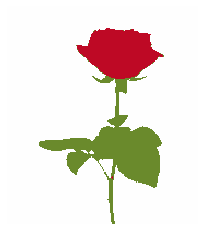

In [46]:
#This is the final image obtained after k means clustering.
plt.imshow(Final_flower_imageL.astype('uint8'))
plt.savefig('flower_image_maximum.png')
plt.axis('off')
plt.show()

# K means clustering for car

In [47]:
#Converts image into matrix.
car_matrix =cv2.imread('car.ppm') 

In [48]:
#This code helps in finding shape of matrix.
n,m,l=car_matrix.shape
n,m,l

(194, 259, 3)

In [49]:
#This code helps in finding the sum mean square fo all 30 random intialization.
N=30
intial_cluster_means=[]
for i in range(N):
    x1=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    x2=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    x3=[random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]
    intial_cluster_means.append([x1,x2,x3])


In [50]:
#This code helps in finding the sum mean square fo all 30 random intialization.
sum_square_error=[]

for z in range(N):
    
    SSE=0
    C1=intial_cluster_means[z][0]
    C2=intial_cluster_means[z][1]
    C3=intial_cluster_means[z][2]
    
    for i in range(n):
        for j in range(m):
            
            K1=sum([k**2 for k in (car_matrix[i,j]-C1)])
            K2=sum([k**2 for k in (car_matrix[i,j]-C2)])
            K3=sum([k**2 for k in (car_matrix[i,j]-C3)])
            K_v=[K1,K2,K3]
            
            SSE += min(K_v)
            
    sum_square_error.append(SSE)

In [51]:
#assigning the random intialization of the minimum and maximum sum_square_error.
S_Ci=sum_square_error.index(min(sum_square_error))
L_Ci=sum_square_error.index(max(sum_square_error))

In [52]:
#intial cluster means for minimum.
SC1=intial_cluster_means[S_Ci][0]
SC2=intial_cluster_means[S_Ci][1]
SC3=intial_cluster_means[S_Ci][2]

In [53]:
#intial cluster means for maximum.
LC1=intial_cluster_means[L_Ci][0]
LC2=intial_cluster_means[L_Ci][1]
LC3=intial_cluster_means[L_Ci][2]

### car image for SME minimum

In [54]:
#This code is to find out the new cluster means with total of 5 iterations.
for t in range(5):
    
    #This are the 3 empty clusters.
    K1_cluster=[]
    K2_cluster=[]
    K3_cluster=[]
    
    #This code helps in dividing datasets into K_clusters and sum square error.
    sse=0
    for i in range(n):
        for j in range(m):
            K1=sum([k**2 for k in (car_matrix[i,j]-SC1)])
            K2=sum([k**2 for k in (car_matrix[i,j]-SC2)])
            K3=sum([k**2 for k in (car_matrix[i,j]-SC3)])
            K_v=[K1,K2,K3]
            K=K_v.index(min(K_v))+1
            
            if K==1:
                K1_cluster.append([i,j])
                sse += min(K_v)
            
            elif K==2:
                K2_cluster.append([i,j])
                sse += min(K_v)
            
            else:
                K3_cluster.append([i,j])
                sse += min(K_v)

    print('This is the SSE(sum_square_error)={}'.format(sse))
            
    #Recompute the patterns centers to be centroids of current clusters by finding the means of each cluster.

    #for K1_cluster
    if len(K1_cluster)==0 or len(K2_cluster)==0 or len(K3_cluster)==0:
        break
    else:
        K1_x=0
        K1_y=0
        K1_z=0
        length_K1_cluster=len(K1_cluster)
        for k1 in range(length_K1_cluster):
            i,j=K1_cluster[k1][0],K1_cluster[k1][1]
            K1_x += car_matrix[i,j][0]
            K1_y += car_matrix[i,j][1]
            K1_z += car_matrix[i,j][2]

        K1_x=round(K1_x/length_K1_cluster)
        K1_y=round(K1_y/length_K1_cluster)
        K1_z=round(K1_z/length_K1_cluster)
        K1_array=[K1_x,K1_y,K1_z]
        print('This is the C1(cluster mean value)={}'.format(K1_array))

        #for K2_cluster
        K2_x=0
        K2_y=0
        K2_z=0
        length_K2_cluster=len(K2_cluster)
        for k2 in range(length_K2_cluster):
            i,j=K2_cluster[k2][0],K2_cluster[k2][1]
            K2_x += car_matrix[i,j][0]
            K2_y += car_matrix[i,j][1]
            K2_z += car_matrix[i,j][2]

        K2_x=round(K2_x/length_K2_cluster)
        K2_y=round(K2_y/length_K2_cluster)
        K2_z=round(K2_z/length_K2_cluster)
        K2_array=[K2_x,K2_y,K2_z]
        print('This is the C2(cluster mean value)={}'.format(K2_array))

        #for K2_cluster
        K3_x=0
        K3_y=0
        K3_z=0
        length_K3_cluster=len(K3_cluster)
        for k3 in range(length_K3_cluster):
            i,j=K3_cluster[k3][0],K3_cluster[k3][1]
            K3_x += car_matrix[i,j][0]
            K3_y += car_matrix[i,j][1]
            K3_z += car_matrix[i,j][2]

        K3_x=round(K3_x/length_K3_cluster)
        K3_y=round(K3_y/length_K3_cluster)
        K3_z=round(K3_z/length_K3_cluster)
        K3_array=[K3_x,K3_y,K3_z]
        print('This is the C3(cluster mean value)={}'.format(K3_array))
        print("\n")
    
        SC1=K1_array
        SC2=K2_array
        SC3=K3_array

This is the SSE(sum_square_error)=475527041
This is the C1(cluster mean value)=[52.0, 46.0, 51.0]
This is the C2(cluster mean value)=[34.0, 37.0, 214.0]
This is the C3(cluster mean value)=[243.0, 242.0, 243.0]


This is the SSE(sum_square_error)=184962436.0
This is the C1(cluster mean value)=[49.0, 43.0, 48.0]
This is the C2(cluster mean value)=[36.0, 39.0, 213.0]
This is the C3(cluster mean value)=[242.0, 240.0, 240.0]


This is the SSE(sum_square_error)=183800493.0
This is the C1(cluster mean value)=[48.0, 42.0, 47.0]
This is the C2(cluster mean value)=[37.0, 40.0, 212.0]
This is the C3(cluster mean value)=[241.0, 240.0, 240.0]


This is the SSE(sum_square_error)=183676851.0
This is the C1(cluster mean value)=[47.0, 42.0, 47.0]
This is the C2(cluster mean value)=[37.0, 40.0, 212.0]
This is the C3(cluster mean value)=[241.0, 240.0, 240.0]


This is the SSE(sum_square_error)=183671182.0
This is the C1(cluster mean value)=[47.0, 42.0, 47.0]
This is the C2(cluster mean value)=[37.0, 40.0

In [55]:
#This code is used to replace each pixel value in the input image wth the cluster center it belongs to. 
Final_car_imageS=np.zeros((n,m,l))
for i in range(n):
    for j in range(m):
        if [i,j] in K1_cluster:
            Final_car_imageS[i,j]=SC1
            
        elif [i,j] in K2_cluster:
            Final_car_imageS[i,j]=SC2
        
        else:
            Final_car_imageS[i,j]=SC3

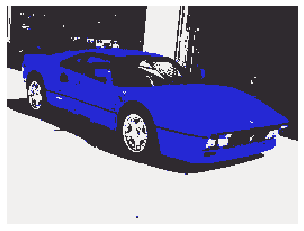

In [56]:
#This is the final image obtained after k means clustering.
plt.imshow(Final_car_imageS.astype('uint8'))
plt.savefig('car_image_minimum.png')
plt.axis('off')
plt.show()

### Car image for SME maximum

In [57]:
#This code is to find out the new cluster means with total of 5 iterations.
for t in range(5):
    
    #This are the 3 empty clusters.
    K1_cluster=[]
    K2_cluster=[]
    K3_cluster=[]
    
    #This code helps in dividing datasets into K_clusters and sum square error.
    sse=0
    for i in range(n):
        for j in range(m):
            K1=sum([k**2 for k in (car_matrix[i,j]-LC1)])
            K2=sum([k**2 for k in (car_matrix[i,j]-LC2)])
            K3=sum([k**2 for k in (car_matrix[i,j]-LC3)])
            K_v=[K1,K2,K3]
            K=K_v.index(min(K_v))+1
            
            if K==1:
                K1_cluster.append([i,j])
                sse += min(K_v)
            
            elif K==2:
                K2_cluster.append([i,j])
                sse += min(K_v)
            
            else:
                K3_cluster.append([i,j])
                sse += min(K_v)

    print('This is the SSE(sum_square_error)={}'.format(sse))
            
    #Recompute the patterns centers to be centroids of current clusters by finding the means of each cluster.

    #for K1_cluster
    if len(K1_cluster)==0 or len(K2_cluster)==0 or len(K3_cluster)==0:
        break
    else:
        K1_x=0
        K1_y=0
        K1_z=0
        length_K1_cluster=len(K1_cluster)
        for k1 in range(length_K1_cluster):
            i,j=K1_cluster[k1][0],K1_cluster[k1][1]
            K1_x += car_matrix[i,j][0]
            K1_y += car_matrix[i,j][1]
            K1_z += car_matrix[i,j][2]

        K1_x=round(K1_x/length_K1_cluster)
        K1_y=round(K1_y/length_K1_cluster)
        K1_z=round(K1_z/length_K1_cluster)
        K1_array=[K1_x,K1_y,K1_z]
        print('This is the C1(cluster mean value)={}'.format(K1_array))

        #for K2_cluster
        K2_x=0
        K2_y=0
        K2_z=0
        length_K2_cluster=len(K2_cluster)
        for k2 in range(length_K2_cluster):
            i,j=K2_cluster[k2][0],K2_cluster[k2][1]
            K2_x += car_matrix[i,j][0]
            K2_y += car_matrix[i,j][1]
            K2_z += car_matrix[i,j][2]

        K2_x=round(K2_x/length_K2_cluster)
        K2_y=round(K2_y/length_K2_cluster)
        K2_z=round(K2_z/length_K2_cluster)
        K2_array=[K2_x,K2_y,K2_z]
        print('This is the C2(cluster mean value)={}'.format(K2_array))

        #for K2_cluster
        K3_x=0
        K3_y=0
        K3_z=0
        length_K3_cluster=len(K3_cluster)
        for k3 in range(length_K3_cluster):
            i,j=K3_cluster[k3][0],K3_cluster[k3][1]
            K3_x += car_matrix[i,j][0]
            K3_y += car_matrix[i,j][1]
            K3_z += car_matrix[i,j][2]

        K3_x=round(K3_x/length_K3_cluster)
        K3_y=round(K3_y/length_K3_cluster)
        K3_z=round(K3_z/length_K3_cluster)
        K3_array=[K3_x,K3_y,K3_z]
        print('This is the C3(cluster mean value)={}'.format(K3_array))
        print("\n")
    
        LC1=K1_array
        LC2=K2_array
        LC3=K3_array

This is the SSE(sum_square_error)=2000048786
This is the C1(cluster mean value)=[250.0, 246.0, 241.0]
This is the C2(cluster mean value)=[132.0, 114.0, 107.0]
This is the C3(cluster mean value)=[122.0, 121.0, 159.0]


This is the SSE(sum_square_error)=635792280.0
This is the C1(cluster mean value)=[251.0, 250.0, 250.0]
This is the C2(cluster mean value)=[48.0, 42.0, 47.0]
This is the C3(cluster mean value)=[65.0, 66.0, 201.0]


This is the SSE(sum_square_error)=188212838.0
This is the C1(cluster mean value)=[245.0, 244.0, 244.0]
This is the C2(cluster mean value)=[39.0, 34.0, 40.0]
This is the C3(cluster mean value)=[60.0, 60.0, 195.0]


This is the SSE(sum_square_error)=179633373.0
This is the C1(cluster mean value)=[244.0, 243.0, 243.0]
This is the C2(cluster mean value)=[37.0, 32.0, 37.0]
This is the C3(cluster mean value)=[61.0, 60.0, 190.0]


This is the SSE(sum_square_error)=178621822.0
This is the C1(cluster mean value)=[244.0, 243.0, 243.0]
This is the C2(cluster mean value)=[3

In [58]:
#This code is used to replace each pixel value in the input image wth the cluster center it belongs to. 
Final_car_imageL=np.zeros((n,m,l))
for i in range(n):
    for j in range(m):
        if [i,j] in K1_cluster:
            Final_car_imageL[i,j]=LC1
            
        elif [i,j] in K2_cluster:
            Final_car_imageL[i,j]=LC2
        
        else:
            Final_car_imageL[i,j]=LC3

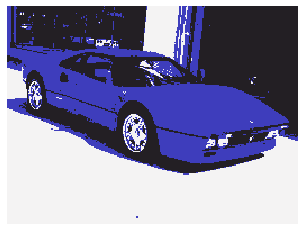

In [59]:
#This is the final image obtained after k means clustering.
plt.imshow(Final_car_imageL.astype('uint8'))
plt.savefig('car_image_maximum.png')
plt.axis('off')
plt.show()